In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [39]:
# trans_dict = {
#     'crop': 22,
#     'noise': 10,
#     'rotate': 17,
# }

# all_df = pd.DataFrame()

# for trans_name in trans_dict.keys():
#     for trans_num in range(trans_dict[trans_name] + 1):

#         df = pd.read_csv(f'/content/{trans_name}IN_to_resnet-IN_{trans_num}')

#         part_df = df[['k*_1', 'class_name']]
#         part_df.insert(0, 'trans_num', trans_num)
#         part_df.insert(0, 'trans_name', f'{trans_name}')

#         all_df = pd.concat([all_df, part_df], axis=0)

# all_df.to_csv('./all_k1_df.csv')
# all_df

,trans_name,trans_num,k*_1,class_name
0,crop,0,0,Airplane
1,crop,0,0,Airplane
2,crop,0,1,Airplane
3,crop,0,1,Airplane
4,crop,0,1,Airplane
...,...,...,...,...
475,rotate,17,4,Truck
476,rotate,17,4,Truck
477,rotate,17,6,Truck
478,rotate,17,8,Truck


In [108]:
all_df = pd.read_csv('/content/all_k1_df.csv')
all_df['k*_1'] = all_df['k*_1'] / 80

trans_dict = {
    'crop': 22,
    'noise': 10,
    'rotate': 17,
}

all_df

,Unnamed: 0,trans_name,trans_num,k*_1,class_name
0,0,crop,0,0.0000,Airplane
1,1,crop,0,0.0000,Airplane
2,2,crop,0,0.0125,Airplane
3,3,crop,0,0.0125,Airplane
4,4,crop,0,0.0125,Airplane
...,...,...,...,...,...
24955,475,rotate,17,0.0500,Truck
24956,476,rotate,17,0.0500,Truck
24957,477,rotate,17,0.0750,Truck
24958,478,rotate,17,0.1000,Truck


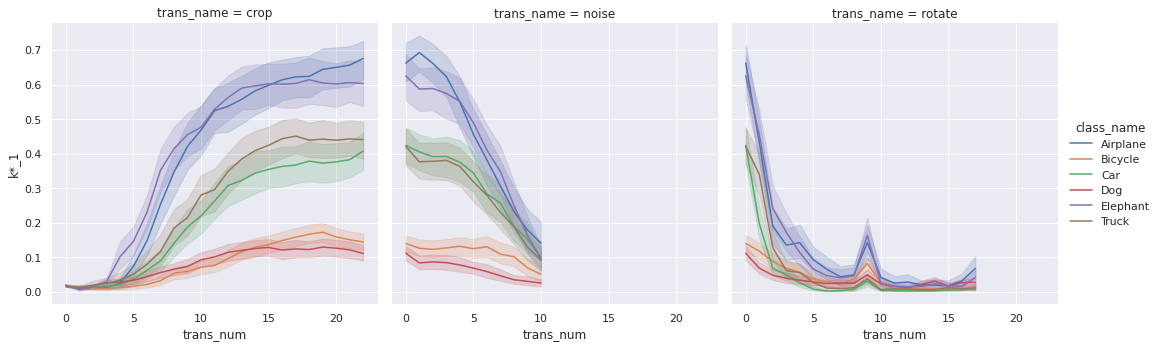

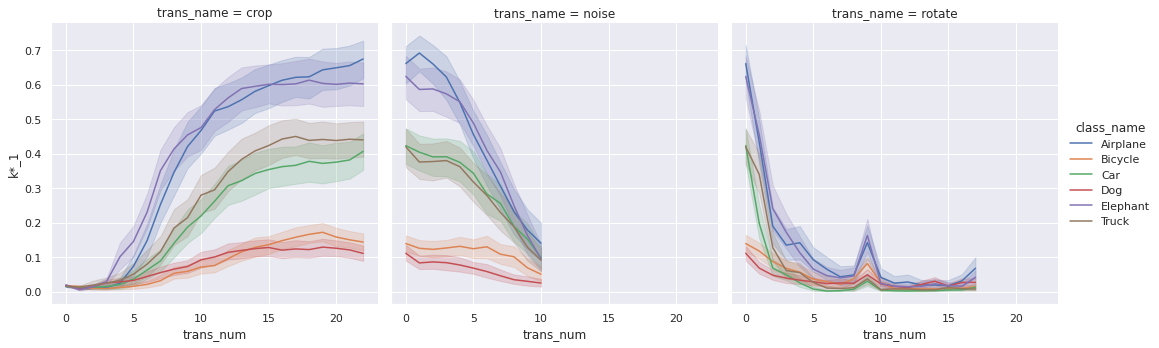

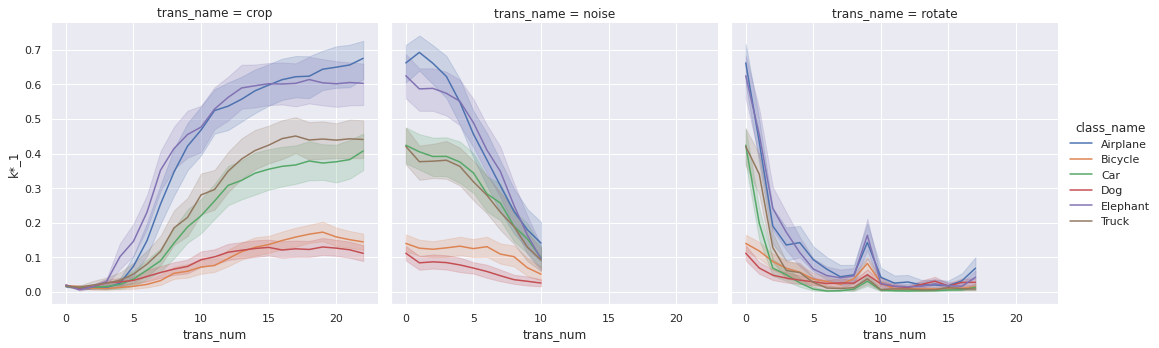

In [110]:
titles = ['Image size after Crop', 'Alpha value of Gaussian noise', 'Counterclockwise Rotation angle']

# plot_all
for trans_name in trans_dict.keys():
    # pl_df = all_df[all_df['trans_name'] == trans_name][['trans_num', 'k*_1', 'class_name']].reset_index()
    pl_df = all_df.reset_index()
    
    sns.relplot(
    data=pl_df,
    x='trans_num',
    y='k*_1',
    hue='class_name',
    col='trans_name',
    kind='line',
    )

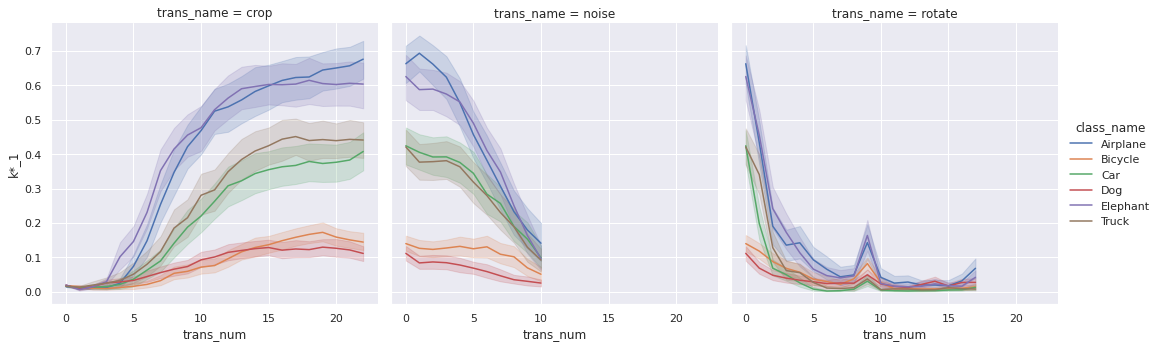

In [112]:
pl_df = all_df.reset_index()

sns.relplot(
    data=pl_df,
    x='trans_num',
    y='k*_1',
    hue='class_name',
    col='trans_name',
    kind='line',
)

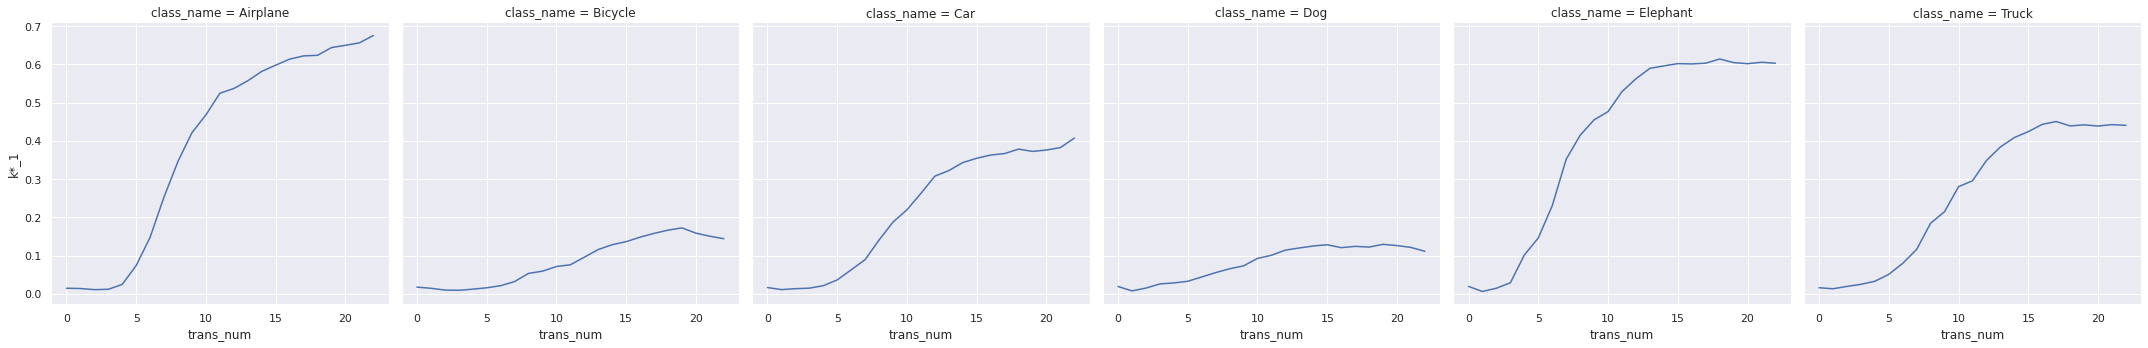

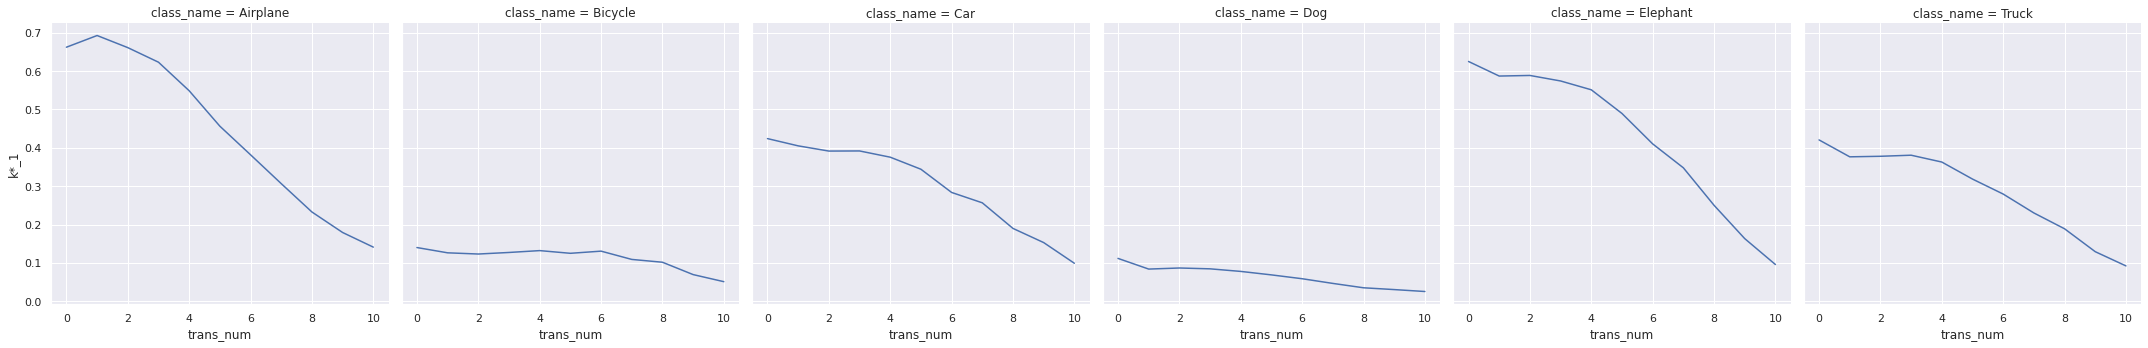

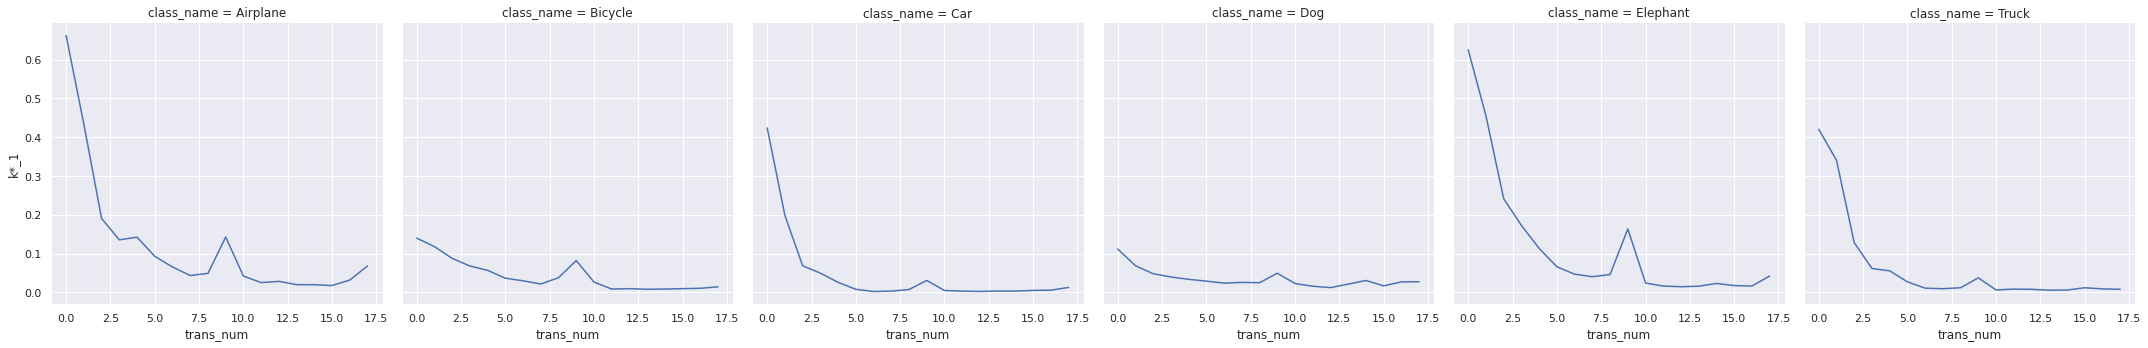

In [105]:

for trans_name in trans_dict.keys():
    all_mean_df = pd.DataFrame()
    for trans_num in range(trans_dict[trans_name] + 1):

        mean_df = all_df[all_df['trans_name'] == trans_name][['trans_num', 'k*_1', 'class_name']]
        mean_df = mean_df[mean_df['trans_num'] == trans_num]
        mean_dict = mean_df.groupby(['class_name'])['k*_1'].mean()
        mean_df = pd.DataFrame(mean_dict).reset_index()
        mean_df.insert(0, 'trans_num', trans_num)

        all_mean_df = pd.concat([all_mean_df, mean_df], axis=0)
    all_mean_df = all_mean_df.reset_index()

    # print(all_mean_df)
    sns.relplot(
    data=all_mean_df,
    x='trans_num',
    y='k*_1',
    col='class_name',
    kind='line',
    )

# plot_mean and std
# for trans_name in trans_dict.keys():
#     sns.relplot(
#     data=mean_d,
#     x='trans_num',
#     y='k*_1',
#     col='class_name',
#     # kind='line',
#     )

## Old Code

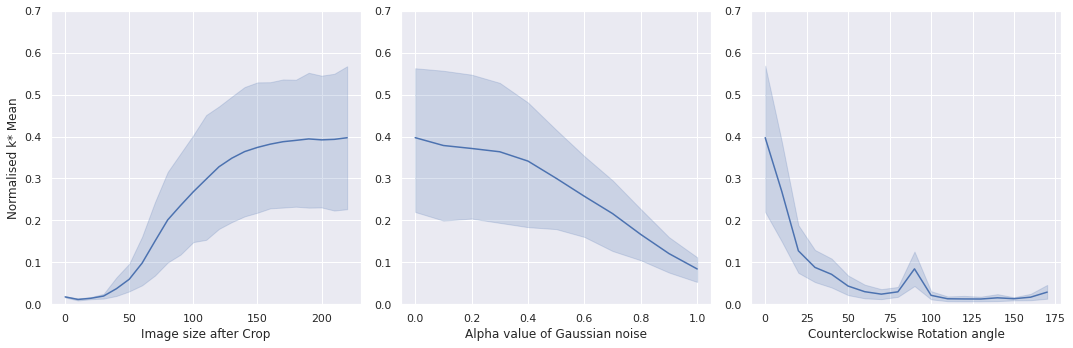

In [96]:
procs = ['crop', 'noise', 'rotate']
titles = ['Image size after Crop', 'Alpha value of Gaussian noise', 'Counterclockwise Rotation angle']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for ax, titi, proc in zip(axes, titles, procs):
    df = pd.read_csv(f'/content/forline_{proc}IN.csv')
    length = df.iloc[-1, 1]+1
    # if proc == 'crop':
    #     df['Strength'] = df.iloc[-1, 1] - df['Strength']
    if proc != 'noise':
        df['Strength'] = 10 * df['Strength']
    else:
        df['Strength'] = 0.1 * df['Strength']

    classes = ['Airplane', 'Bicycle', 'Car', 'Dog', 'Elephant', 'Truck', ]
    push =[]
    for _ in range(length):
        push.extend(classes)

    push = pd.Series(push)
    df.insert(len(df.columns), 'Class', push)

    sns.lineplot(
    data=df, x="Strength", y="Mean", 
    # col='Class',
    # kind="line",
    ax=ax
    )

    # ax.set_labels(f"{titi}", "Normalised k* Mean")
    ax.set_xlabel(f"{titi}")
    ax.set_ylabel("Normalised k* Mean")
    if proc != "crop":
        ax.set_ylabel("")
        # ax.set_yticks([])
    # g.set_titles(f"{proc.capitalize()}")
    ax.set_ylim(0., 0.7)
    # ax.tight_layout()
    # g.savefig(f"./drive/MyDrive/論文関係/k-Space/{proc.capitalize()}_Transformation.png", dpi=300)
fig.tight_layout()
fig.savefig(f"./drive/MyDrive/論文関係/k-Space/all_Transformation.png", dpi=300)